# ZOMATO RESTAURENT RATING

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
dataframe = pd.read_csv("Zomato-data.csv")
dataframe.head()


,Name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [43]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

In [44]:



dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe.head()

,Name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [45]:
dataframe.info()
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


Text(0.5, 0, 'Type of restaurant')

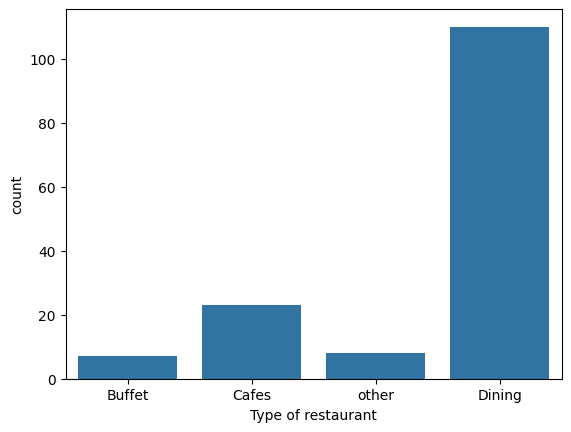

In [46]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

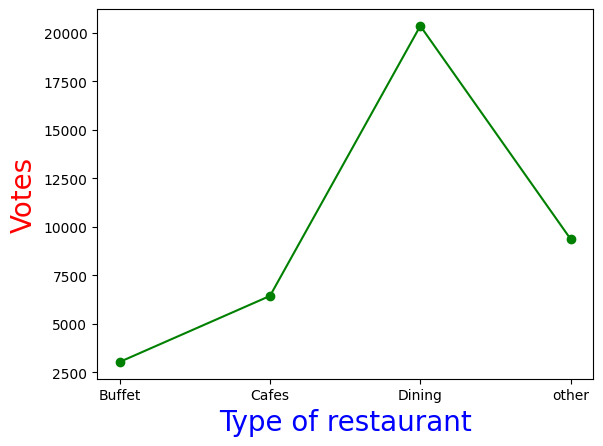

In [47]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='blue', size=20)
plt.ylabel('Votes', c='red', size=20)

In [48]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'Name']

In [49]:
print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: Name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

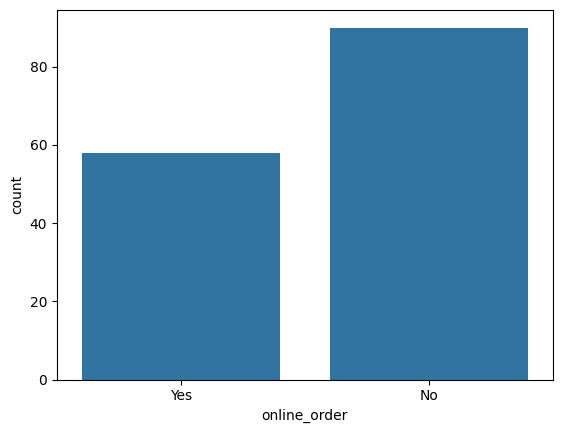

In [50]:
sns.countplot(x=dataframe['online_order'])

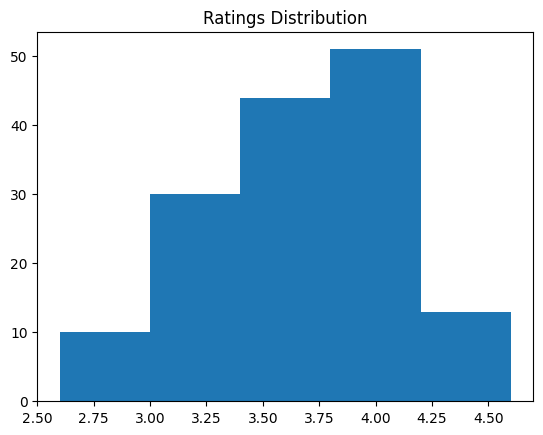

In [51]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

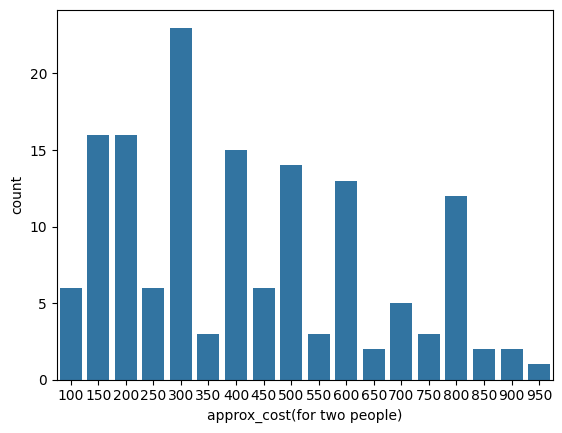

In [52]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

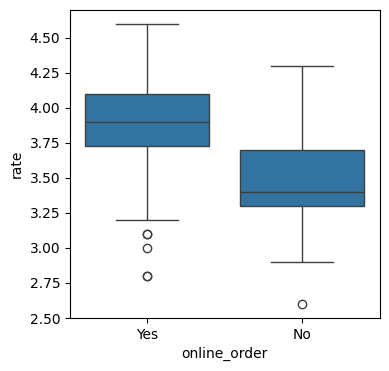

In [53]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

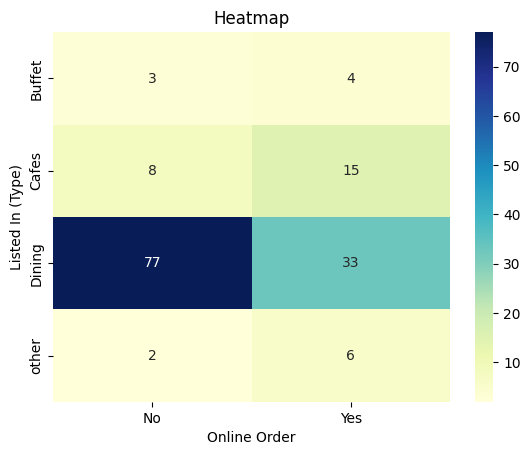

In [54]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

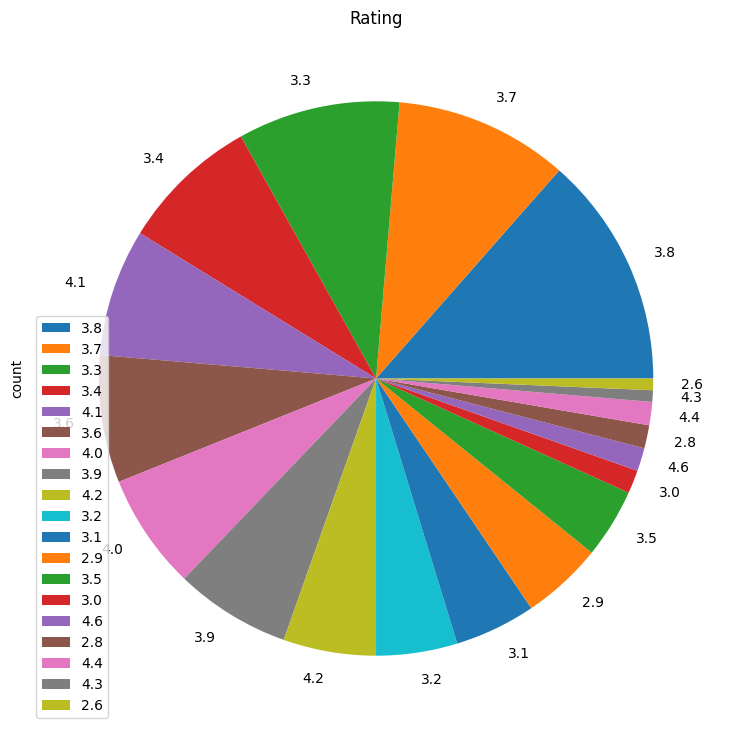

In [55]:
rate = dataframe['rate'].value_counts()

from matplotlib import pyplot as plt
rate.plot(kind='pie', title='Rating', figsize=(9,9))
plt.legend()
plt.show()

**According to to analyses the Dining type restaurant having highest customer but less online Order and other type of Restaurent having higher  online order as compair to the ofline.**
**In Rating , most of the restaurent is lie betweeen 3.75 to  4.00.**
**Need to focus on the Buffer, Cafe and other tpye of Restaurent for increase the sales because zomato is depend  on online order.**